# 1.Importing Libraries and DF

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Importing dataframes
path = r'C:\Users\William Inglish\Instacart Basket Analysis'

df_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customer_merge.pkl'))
df_dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [3]:
df_dept

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


# 2.Addressing PII data

In [4]:
# Dropping first and last name since it is identifiable information. Also dropping _merge column
df_merge = df_merge.drop(columns = ['first_name','last_name','_merge'])

In [5]:
df_merge.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'evaluation_set', 'order_number',
       'order_day_of_the_week', 'order_hour_of_day', 'days_since_prior_order',
       'add_to_cart_order', 'reordered', 'price_range_loc', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_price',
       'spending_flag', 'median_prior_order', 'order_frequency_flag', 'gender',
       'State', 'age', 'date_joined', 'number_of_dependants', 'marital_status',
       'income'],
      dtype='object')

# 3.Regional Segmentation and Spending Habits

In [6]:
# Creating an empty column region
region=[]

In [7]:
# Creating a "region" column based on the "state" column
for value in df_merge['State']:
    if value in ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']:
        region.append('Northeast')
    elif value in ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']:
        region.append('Midwest')
    elif value in ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']:
        region.append('South')
    else:
        region.append('West')

In [8]:
# Assigning new column in df
df_merge['region']=region

In [9]:
#Verifying
df_merge['region'].value_counts(dropna=False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

# 4.Low-activity Customers

In [10]:
# Creating columns based on activity
df_merge.loc[df_merge['max_order']>=5,'active_customer']='High order customer'
df_merge.loc[df_merge['max_order']<5,'active_customer']='Low order customer'

In [11]:
#Verifying
df_merge['active_customer'].value_counts(dropna=False)

High order customer    30964564
Low order customer      1440295
Name: active_customer, dtype: int64

In [12]:
#Creating subset by excluding Low order customers
df_high_cust = df_merge[df_merge['active_customer'] == 'High order customer']

In [13]:
#Exporting df
df_high_cust.to_pickle(os.path.join(path,'02 Data','Prepared Data','df_high_orders.pkl'))

# 5.Customer Profiling

In [14]:
# Creating an age profile
df_merge.loc[df_merge['age']>65,'age_flag']='Senior adult'
df_merge.loc[(df_merge['age']<=65) & (df_merge['age']>30),'age_flag']='Middle-age adult'
df_merge.loc[df_merge['age']<=30,'age_flag']='Young adult'

In [15]:
# Verifying
df_merge['age_flag'].value_counts(dropna=False)

Middle-age adult    17717399
Senior adult         8088101
Young adult          6599359
Name: age_flag, dtype: int64

In [16]:
# Looking at stats of income
df_merge['income'].mean()

99437.73329450376

In [17]:
# Creating an income profile based on the mean
df_merge.loc[df_merge['income']<=50000,'income_flag']='Low income'
df_merge.loc[(df_merge['income']>50000) & (df_merge['income']<=100000),'income_flag']='Middle income'
df_merge.loc[df_merge['income']>100000,'income_flag']='High income'

In [18]:
# Verifying
df_merge['income_flag'].value_counts(dropna=False)

High income      14814202
Middle income    13996574
Low income        3594083
Name: income_flag, dtype: int64

In [19]:
# Looking at frequency of department
df_merge['department_id'].value_counts(dropna=False)

4     9479291
16    5398747
19    2887550
7     2688123
1     2234743
13    1875369
3     1172428
15    1068058
20    1051249
9      866627
17     738666
12     708927
14     703033
11     447572
18     423802
6      269253
5      153696
8       97716
21      69145
2       36291
10      34573
Name: department_id, dtype: int64

In [20]:
# Renaming department column
df_dept.rename(columns={'Unnamed: 0':'department_id'},inplace=True)

In [21]:
# Merging dataframe with department dataframe
df_merge2=df_merge.merge(df_dept,on='department_id')

In [22]:
# Checking frequency of merged dfs
df_merge2['department'].value_counts(dropna=False)

produce            9479291
dairy eggs         5398747
snacks             2887550
beverages          2688123
frozen             2234743
pantry             1875369
bakery             1172428
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
meat seafood        708927
breakfast           703033
personal care       447572
babies              423802
international       269253
alcohol             153696
pets                 97716
missing              69145
other                36291
bulk                 34573
Name: department, dtype: int64

In [23]:
# Creating dependants flag
df_merge2.loc[df_merge2['number_of_dependants']==0,'family_flag']='Single_status'
df_merge2.loc[df_merge2['number_of_dependants']!=0,'family_flag']='Family_status'

In [24]:
df_merge2['family_flag'].value_counts(dropna=False)

Family_status    24307356
Single_status     8097503
Name: family_flag, dtype: int64

# 6.Visualizations of profiles

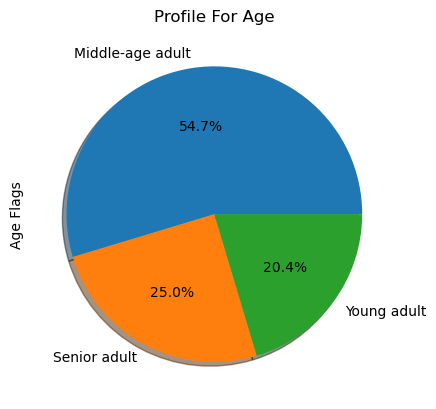

In [25]:
# Visualization for age profile
age_pieplot=df_merge2['age_flag'].value_counts().plot.pie(title='Profile For Age',label='Age Flags', shadow = True, autopct=('%1.1f%%'))

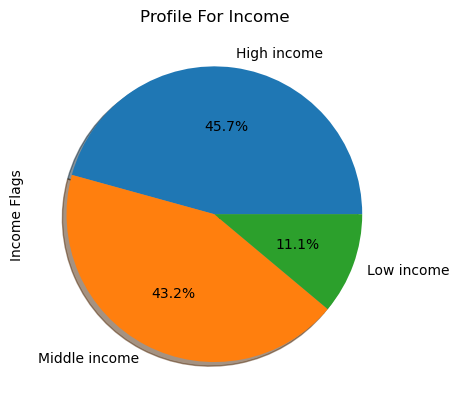

In [26]:
# Visualization for income profile
income_pieplot=df_merge2['income_flag'].value_counts().plot.pie(title='Profile For Income',label='Income Flags', shadow = True, autopct=('%1.1f%%'))

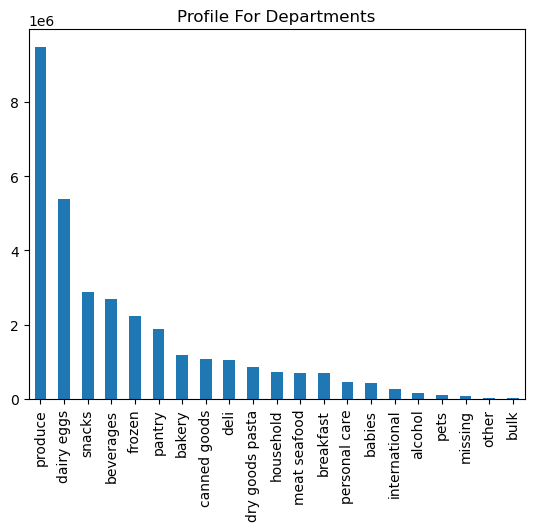

In [27]:
# Visualization for department profile
department_bar=df_merge2['department'].value_counts().plot.bar(title='Profile For Departments')

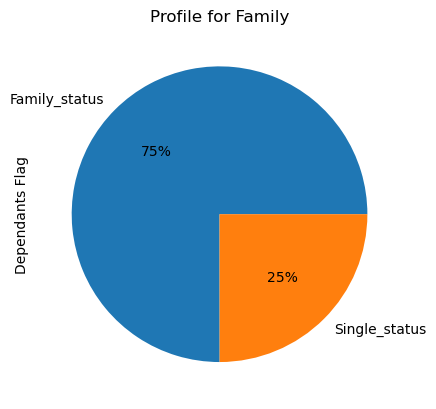

In [28]:
# Visualization for dependants profile
depend_pie=df_merge2['family_flag'].value_counts().plot.pie(title='Profile for Family',label='Dependants Flag',autopct=('%1.f%%'))

In [29]:
# Exporting visuals
age_pieplot.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','age_pieplot.png'))

In [30]:
income_pieplot.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','income_pieplot.png'))

In [31]:
department_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','department_bar.png'))

In [32]:
depend_pie.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','depend_pie.png'))

# 7.Aggregating Customer Profiles

In [33]:
# Age aggregation based on "days since prior order" and "prices"
df_merge2.groupby('age_flag').agg({'days_since_prior_order':['min', 'max', 'mean'], 'prices':['min', 'max', 'mean']})

days_since_prior_order                  prices        \
                                    min   max       mean    min   max   
age_flag                                                                
Middle-age adult                    0.0  30.0  11.103184    1.0  25.0   
Senior adult                        0.0  30.0  11.080922    1.0  25.0   
Young adult                         0.0  30.0  11.134870    1.0  25.0   

                            
                      mean  
age_flag                    
Middle-age adult  7.793698  
Senior adult      7.795308  
Young adult       7.783453

In [34]:
# Income aggregation based on "days since prior order" and "prices"
df_merge2.groupby('income_flag').agg({'days_since_prior_order':['min', 'max', 'mean'], 'prices':['min', 'max', 'mean']})

days_since_prior_order                  prices                
                                 min   max       mean    min   max      mean
income_flag                                                                 
High income                      0.0  30.0  11.039865    1.0  25.0  7.961310
Low income                       0.0  30.0  11.587220    1.0  25.0  6.696985
Middle income                    0.0  30.0  11.049312    1.0  25.0  7.894011

In [35]:
# Departments aggregation based on "days since prior order" and "prices"
df_merge2.groupby('department').agg({'days_since_prior_order':['min', 'max', 'mean'], 'prices':['min', 'max', 'mean']})

days_since_prior_order                  prices        \
                                   min   max       mean    min   max   
department                                                             
alcohol                            0.0  30.0  10.340887    1.0  15.0   
babies                             0.0  30.0  10.004465    1.0  15.0   
bakery                             0.0  30.0  11.097613    1.0  15.0   
beverages                          0.0  30.0  11.053389    1.0  15.0   
breakfast                          0.0  30.0  11.296101    1.0  14.9   
bulk                               0.0  30.0  10.104230    1.4  14.1   
canned goods                       0.0  30.0  11.656079    1.0  15.0   
dairy eggs                         0.0  30.0  10.986054    1.0  15.0   
deli                               0.0  30.0  11.345655    1.0  15.0   
dry goods pasta                    0.0  30.0  11.774450    1.0  15.0   
frozen                             0.0  30.0  11.730829    1.0  15.0   
household                          0.0  30.0  11.996490    1.0  15.0   
international                      0.0  30.0  11.291251    1.0  15.0   
meat seafood                       0.0  30.0  11.432021    8.0  25.0   
missing                            0.0  30.0  10.218559    1.0  15.0   
other                              0.0  30.0  10.952867    1.1  15.0   
pantry                             0.0  30.0  11.163256    1.0  20.0   
personal care                      0.0  30.0  11.593145    1.0  15.0   
pets                               0.0  30.0  11.867322    1.0  15.0   
produce                            0.0  30.0  10.856212    1.0  15.0   
snacks                             0.0  30.0  10.947879    1.6   7.0   

                            
                      mean  
department                  
alcohol           8.143701  
babies            7.638380  
bakery            7.853809  
beverages         7.680502  
breakfast         8.028963  
bulk              8.348960  
canned goods      7.539976  
dairy eggs        8.340656  
deli              7.778701  
dry goods pasta   7.350283  
frozen            7.736553  
household         7.384058  
international     7.682264  
meat seafood     16.294443  
missing           8.660716  
other             6.990934  
pantry            8.009443  
personal care     7.996769  
pets              7.889070  
produce           7.981708  
snacks            4.275437

In [36]:
# Dependants aggregation based on "days since prior order" and "prices"
df_merge2.groupby('family_flag').agg({'days_since_prior_order':['min', 'max', 'mean'], 'prices':['min', 'max', 'mean']})

days_since_prior_order                  prices                
                                 min   max       mean    min   max      mean
family_flag                                                                 
Family_status                    0.0  30.0  11.111834    1.0  25.0  7.792373
Single_status                    0.0  30.0  11.080805    1.0  25.0  7.790933

# 8. and 9. Correlation of Regions and Departments with Customer Profiles With Visuals

In [41]:
# Creating a crosstab between age and region
age_and_region=pd.crosstab(df_merge2['region'],df_merge2['age_flag'],dropna=False)

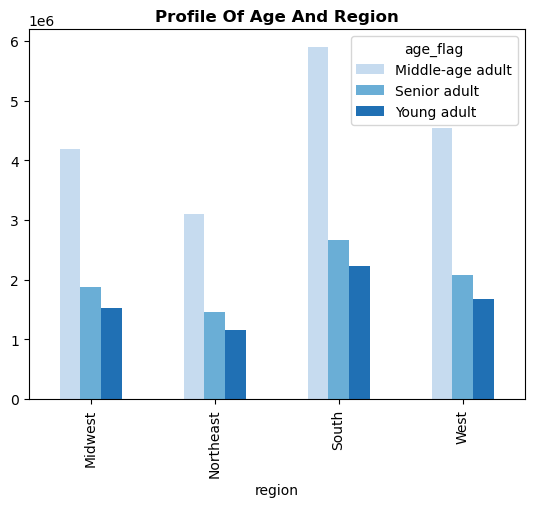

In [42]:
# Creating a bar chart between age and region
age_n_region_bar=age_and_region.plot.bar(color=sns.color_palette('Blues',3))
plt.title('Profile Of Age And Region', fontweight='bold')
plt.show()

In [43]:
# Creating a crosstab between age and department
age_n_dept=pd.crosstab(df_merge2['department'],df_merge2['age_flag'],dropna=False)

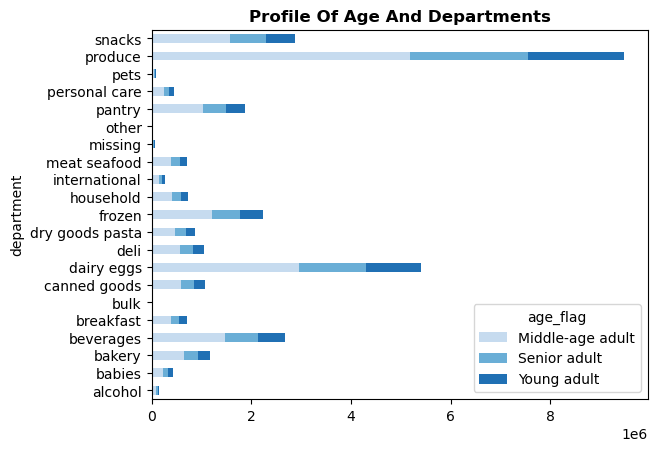

In [44]:
#Create a stacked bar chart between age and department
age_dept_stacked=age_n_dept.plot.barh(stacked=True,color=sns.color_palette('Blues',3))
plt.title('Profile Of Age And Departments', fontweight='bold')
plt.show()

In [45]:
# Creating a crosstab between income and region
income_n_region=pd.crosstab(df_merge2['region'],df_merge2['income_flag'],dropna=False)

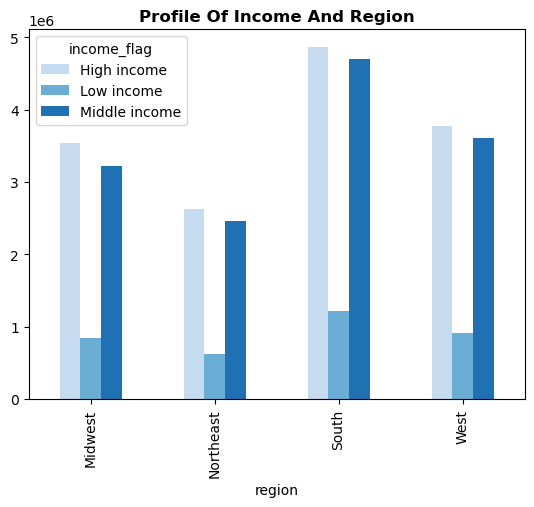

In [47]:
# Creating a bar chart between income and region
income_region_bar=income_n_region.plot.bar(color=sns.color_palette('Blues',3))
plt.title('Profile Of Income And Region', fontweight='bold')
plt.show()

In [48]:
# Creating a crosstab between income and department
income_n_dept=pd.crosstab(df_merge2['department'],df_merge2['income_flag'],dropna=False)

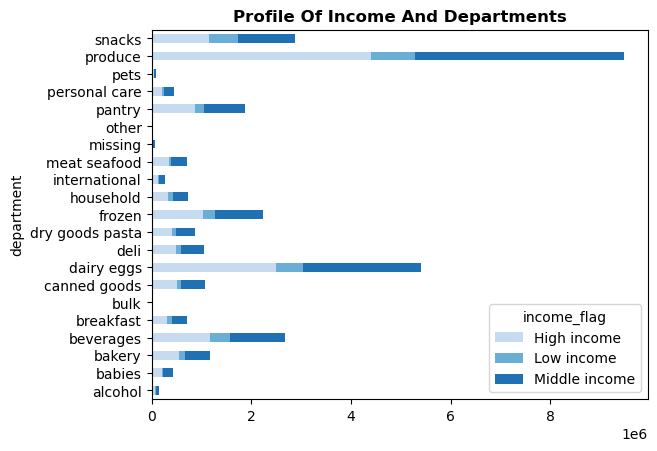

In [49]:
# Creating a stacked bar chart between income and department
income_dept_stacked=income_n_dept.plot.barh(stacked=True,color=sns.color_palette('Blues',3))
plt.title('Profile Of Income And Departments', fontweight='bold')
plt.show()

In [50]:
# Creating a crosstab between dependants and region
depend_n_region=pd.crosstab(df_merge2['region'],df_merge2['family_flag'],dropna=False)

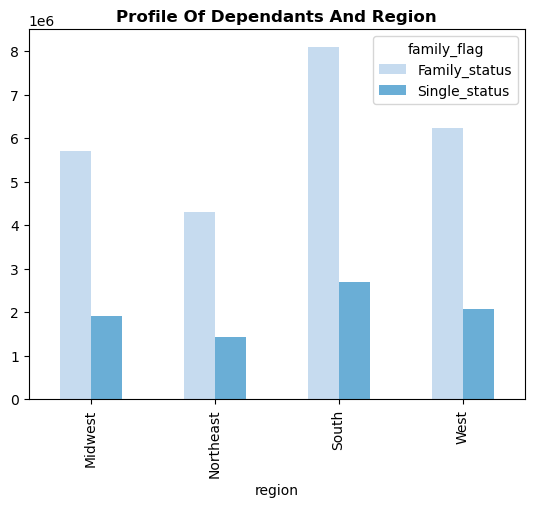

In [52]:
# Creating a bar chart between dependants and region
depend_region_bar=depend_n_region.plot.bar(color=sns.color_palette('Blues',3))
plt.title('Profile Of Dependants And Region', fontweight='bold')
plt.show()

In [53]:
# Creating a crosstab between dependants and departments
family_n_dept=pd.crosstab(df_merge2['department'],df_merge2['family_flag'],dropna=False)

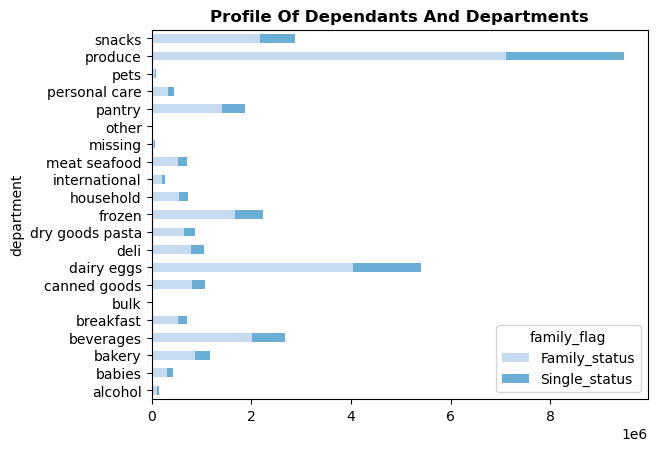

In [54]:
# Creating a stacked bar chart between dependants and department
family_dept_stacked=family_n_dept.plot.barh(stacked=True,color=sns.color_palette('Blues',3))
plt.title('Profile Of Dependants And Departments', fontweight='bold')
plt.show()

In [55]:
# Exporting all visuals
age_n_region_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','age_n_region_bar.png'))

In [56]:
age_dept_stacked.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','age_dept_stacked.png'))

In [57]:
income_region_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','income_region_bar.png'))

In [58]:
income_dept_stacked.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','income_dept_stacked.png'))

In [59]:
depend_region_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','depend_region_bar.png'))

In [60]:
family_dept_stacked.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','family_dept_stacked.png'))

# 10. Exporting Final DF

In [61]:
df_merge2.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_df.pkl'))